# 연습 : 영화 평점
파일 : rating.csv

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# numpy 만 사용하세요.
# pandas 는 사용하지 마세요

In [3]:
# rating.csv

# userid, movieid, rating

## 1. 파일 읽어 들이기

In [4]:
# rating.csv 파일의 내용을 확인하고
# numpy 의 array 로 읽어 들어와 arr_rating 이라는 변수에 담습니다.
# 읽어온뒤 내용도 확인합니다

In [5]:
datapath = 'C:/DevRoot/dataset/021_numpy/rating.csv'

In [6]:
arr_rating = np.loadtxt(datapath, delimiter=',')
arr_rating

array([[1.000e+00, 2.000e+00, 3.500e+00],
       [1.000e+00, 2.900e+01, 3.500e+00],
       [1.000e+00, 3.200e+01, 3.500e+00],
       ...,
       [7.020e+02, 1.377e+03, 1.500e+00],
       [7.020e+02, 1.378e+03, 1.500e+00],
       [7.020e+02, 1.380e+03, 3.500e+00]])

## 2.데이터 탐색하기 (EDA)

In [7]:
# arr_rating 의 
# A) 데이터 개수, 차원 정보등을 확인해봅니다.
# B)  0 ~ 4번째 row만 출력해봅니다
# C)  0번째 칼럼(열)만 출력

In [8]:
arr_rating.ndim # 2차원 

2

In [9]:
arr_rating.shape # (100000, 3) 십만행, 삼열

(100000, 3)

In [10]:
arr_rating.size # 총 30만개의 데이터

300000

In [11]:
len(arr_rating)

100000

In [12]:
arr_rating.dtype

dtype('float64')

In [13]:
arr_rating[0:4] # 0 ~ 4번째 row만 출력

array([[ 1. ,  2. ,  3.5],
       [ 1. , 29. ,  3.5],
       [ 1. , 32. ,  3.5],
       [ 1. , 47. ,  3.5]])

In [14]:
arr_rating[:,0]  # userid 만 따로 뽑기

array([  1.,   1.,   1., ..., 702., 702., 702.])

In [15]:
arr_rating[::,1] # movieid 

array([   2.,   29.,   32., ..., 1377., 1378., 1380.])

In [16]:
arr_rating[::,2] # rating

array([3.5, 3.5, 3.5, ..., 1.5, 1.5, 3.5])

## 3. 영화의 개수 구하기

In [17]:
# 평점이 매겨진 영화의 개수를 구해보세요

In [18]:
userid = arr_rating[::,0]
userid

array([  1.,   1.,   1., ..., 702., 702., 702.])

In [19]:
np.unique(userid).size  # 전체 유저 수 702명 (잘되나 그냥 해봄)

702

In [20]:
movieid = arr_rating[::,1]  # 영화번호들 array
movieid

array([   2.,   29.,   32., ..., 1377., 1378., 1380.])

In [21]:
np.unique(movieid).size # 전체 영화 총 갯수 8227개

8227

## 4. 1번 유저에 대한 모든 평점 정보 구하기

In [22]:
# 1번 유저의 '평점 개수' 와 '평점 평균' 을 구하세요

In [23]:
user1_info = arr_rating[arr_rating[:,0] == 1]
user1_info[::,2].mean()
user1_info[::,2].size
user1_info[::,2].max()
user1_info[::,2].min()

print(f'유저1 의 평점 갯수는 {user1_info[::,2].size}개 입니다.')
print(f'유저1 의 평점 평균은 {user1_info[::,2].mean():.2f}점 입니다.')
print(f'유저1 의 평점 최고 점수는 {user1_info[::,2].max()}점 최저 점수는 {user1_info[::,2].min()}입니다.')

유저1 의 평점 갯수는 175개 입니다.
유저1 의 평점 평균은 3.74점 입니다.
유저1 의 평점 최고 점수는 5.0점 최저 점수는 3.0입니다.


## 5. 각 유저별 정보 구하기

In [24]:
# 각 유저별
# 유저 아이디, 평점회수, 평점 평균
# 아래와 같이 list 로 출력

"""
[[1, 175, 3.742857142857143],
 [2, 61, 4.0],
 [3, 187, 4.122994652406417],
 [4, 28, 3.5714285714285716],
 [5, 66, 4.2727272727272725],
 [6, 24, 3.75],
 ...
 ...
"""
None

In [25]:
arr_rating[:,1], arr_rating[:,2]

(array([   2.,   29.,   32., ..., 1377., 1378., 1380.]),
 array([3.5, 3.5, 3.5, ..., 1.5, 1.5, 3.5]))

In [26]:
arr_rating[:10,0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [27]:
users = np.unique(arr_rating[:,0])   #전체 userid
users[:10]  # 10개만 출력

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [28]:
# arr_rating[arr_rating[:,0] == x][:,2]  # user가 x인 사람의 평점 array
arr_rating[arr_rating[:,0] == 1][:,2].mean()  # user가 1인 사람의 평점의 평균 array


3.742857142857143

In [29]:
xxx = arr_rating[arr_rating[:,0] == 1][:,2].mean()
xxx

3.742857142857143

In [30]:
movie_rate_info_byusers = [
    f"{int(i)},{arr_rating[arr_rating[:,0] == i].size},{(arr_rating[arr_rating[:,0] == i][:,2].mean()):.4f}".split(',')
    for i in users
]

# 와 코드 더럽다;

In [31]:
movie_rate_info_byusers[:10]

[['1', '525', '3.7429'],
 ['2', '183', '4.0000'],
 ['3', '561', '4.1230'],
 ['4', '84', '3.5714'],
 ['5', '198', '4.2727'],
 ['6', '72', '3.7500'],
 ['7', '828', '3.2899'],
 ['8', '210', '3.8000'],
 ['9', '105', '3.0571'],
 ['10', '114', '3.8947']]

## 6. 특정 영화의 평점 분포도
175번 영화의 평점은 몇개나 있을가?

In [32]:
# ↓결과출력 예시
"""
1.0 - 1개
2.0 - 3개
3.0 - 8개
3.5 - 3개 
4.0 - 7개
4.5 - 2개
5.0 - 4개
"""
# 시각화 예시 ↓

'\n1.0 - 1개\n2.0 - 3개\n3.0 - 8개\n3.5 - 3개 \n4.0 - 7개\n4.5 - 2개\n5.0 - 4개\n'

In [33]:
moviexx_info = arr_rating[arr_rating[:,1] == 300]
moviexx_info[:10]

array([[ 13., 300.,   2.],
       [ 15., 300.,   3.],
       [ 24., 300.,   3.],
       [ 26., 300.,   4.],
       [ 29., 300.,   2.],
       [ 32., 300.,   3.],
       [ 38., 300.,   1.],
       [ 46., 300.,   5.],
       [ 54., 300.,   2.],
       [ 58., 300.,   4.]])

In [34]:
movie175_info = arr_rating[arr_rating[:,1] == 175]   # 175번 영화 정보
movie175_info[:10]  # 상위 10개만 우선 출력

array([[  3. , 175. ,   5. ],
       [ 25. , 175. ,   4.5],
       [ 53. , 175. ,   4. ],
       [ 69. , 175. ,   3. ],
       [104. , 175. ,   1. ],
       [116. , 175. ,   3. ],
       [129. , 175. ,   3.5],
       [131. , 175. ,   2. ],
       [134. , 175. ,   5. ],
       [215. , 175. ,   2. ]])

In [35]:
rate_data175 = movie175_info[::,2] # 175 영화의 모든 평점 array
rate_data175  # 175 번 영화가 받은 모든 평점들

array([5. , 4.5, 4. , 3. , 1. , 3. , 3.5, 2. , 5. , 2. , 3. , 4. , 3.5,
       3. , 3. , 5. , 2. , 3. , 4. , 3. , 3.5, 5. , 4. , 4. , 4. , 4. ,
       4.5, 3. ])

In [36]:
rate_data175[rate_data175 == 0].size

0

In [37]:
np.unique(movie175_info[::,2], return_counts = True)

(array([1. , 2. , 3. , 3.5, 4. , 4.5, 5. ]),
 array([1, 3, 8, 3, 7, 2, 4], dtype=int64))

In [38]:
rate, counts  = np.unique(movie175_info[::,2], return_counts = True)

rate_dict = dict(zip(rate, counts))
rate_dict

{1.0: 1, 2.0: 3, 3.0: 8, 3.5: 3, 4.0: 7, 4.5: 2, 5.0: 4}

In [39]:
rate_cnt = []
rate_value = []
for i in range(11):
#     rate_dict.update({i/2 : rate_dict.get(i/2, 0)})
    rate_cnt.append(rate_data175[rate_data175 == (i/2)].size)
    rate_value.append(i/2)
rate_cnt, rate_value

([0, 0, 1, 0, 3, 0, 8, 3, 7, 2, 4],
 [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

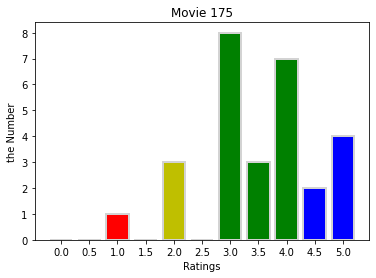

In [40]:
x = np.arange(11)  # array([0, 1, 2])

colors = ['r','r','r','y','y','y','g','g','g','b','b']

plt.bar(x, rate_cnt, color=colors, edgecolor='lightgray',  linewidth="2")
plt.xticks(x, rate_value)
plt.xlabel('Ratings')
plt.ylabel('the Number')
plt.title('Movie 175')
plt.show()

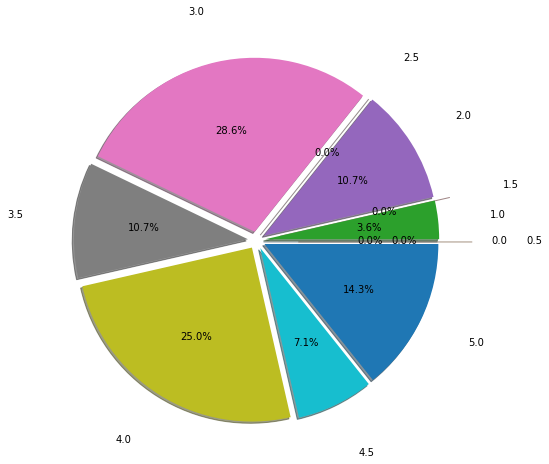

In [41]:
explode = [0.10, 0.50, 0.10, 0.30, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]

plt.pie(rate_cnt, labels=rate_value, autopct='%.1f%%', labeldistance=1.3, radius=2 ,explode=explode, shadow=True)
plt.show()